<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Health_Insurance_ml_al_project_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/My Drive/Kaggle'

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
import pandas as pd

In [ ]:
!kaggle kernels output priyang/health-insurance-cost-prediction-using-ml -p /path/to/dest

Kernel log downloaded to /path/to/dest/health-insurance-cost-prediction-using-ml.log 


In [ ]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
data=pd.read_csv('health insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.shape

(1338, 7)

In [ ]:
print('Number of rows',data.shape[0])
print('Number of columns', data.shape[1])

Number of rows 1338
Number of columns 7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#Convert column from string['sex','smoker'.'region'] to Numerical value

In [ ]:
data['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['sex'].map({'female':0,'male':1})

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [ ]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [ ]:
data.head()       # convert sex into 0 and 1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [ ]:
data['region']

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


#Store feature matrix in X and Response(Target)in Vector y

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
X=data.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


# y is in vector form

In [ ]:
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Convert Data into training and testing sets
#Train the model's on training set
#Test the model's on testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
737,26,1,23.700,2,0,1
369,18,1,30.400,3,0,4
284,52,0,31.200,0,0,1
1302,25,0,20.800,1,0,1
958,43,1,34.960,1,1,4
...,...,...,...,...,...,...
1330,57,0,25.740,2,0,2
1016,19,0,24.605,1,0,3
165,47,1,28.215,4,0,4
7,37,0,27.740,3,0,3


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40) #Data can fixed same sequence of random number

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
737,26,1,23.700,2,0,1
369,18,1,30.400,3,0,4
284,52,0,31.200,0,0,1
1302,25,0,20.800,1,0,1
958,43,1,34.960,1,1,4
...,...,...,...,...,...,...
1330,57,0,25.740,2,0,2
1016,19,0,24.605,1,0,3
165,47,1,28.215,4,0,4
7,37,0,27.740,3,0,3


#Import the models like regression problem

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Model Training using fit 

In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)
svr=SVR()
svr.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)


GradientBoostingRegressor()

#Prediction on test data

In [ ]:
y_pred1=lr.predict(X_test)
y_pred2=svr.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gb.predict(X_test)
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svr':y_pred2,'rf':y_pred3,'gb':y_pred4})
df1

,Actual,lr,svr,rf,gb
1099,3227.12110,5690.742327,9258.284176,7457.556318,5004.844791
759,36307.79830,28333.936873,9241.976345,37516.659627,37303.131462
215,7371.77200,11067.677924,9352.145195,7391.294844,7330.143491
903,8125.78450,12044.462409,9405.601080,9753.142646,10333.484274
989,14571.89080,24829.134726,9254.348771,15057.756281,19049.773526
...,...,...,...,...,...
408,6652.52880,5897.338288,9325.488046,7386.901066,6641.070744
466,13224.69300,12608.705595,9463.800107,20719.973497,17413.217947
724,10106.13425,10395.178377,9407.990815,10609.877143,11154.621342
693,2352.96845,1693.416554,9252.193397,4905.723552,4260.270287


#Compare Performance visually

In [ ]:
import matplotlib.pyplot as plt


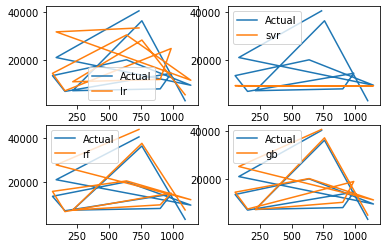

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svr'].iloc[0:11],label='svr')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gb'].iloc[0:11],label='gb')
plt.legend()

In [ ]:
# To select best model(evaluating the algorithm)
# Rsquare is used for goodness for fit

In [ ]:
from sklearn import metrics

In [ ]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)        #Higher r2 value is good for model

0.7340463835777766 -0.08962141402193424 0.8489450772425216 0.8542890686638847


In [ ]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)
print(s1,s2,s3,s4)       #lesser absolute mean value is good

4358.130765872681 8445.388513774707 2662.621311266984 2521.1395227299236


Now we can predict  gb model best for data. 